# Women's E-Commerce Clothing Reviews

![alt text](https://images.unsplash.com/photo-1540221652346-e5dd6b50f3e7?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=500&q=60)

# Contents

1. [Introduction](#Introduction)

2. [Dataset Desciption](#Dataset-Discription:)

3. [Problem Statement](#Problem-statement)

4. [Data preprocessing](#Data-preprocessing)

5. [Visualising data for better understanding](#visdualising-data-for-better-understanding)

6. [Cleaning text & making a vocabulary](#Cleaning-text-&-making-a-vocabulary)

7. Models

8. [Conclusion](#Conclusion)


# Introduction

>This notebook is concerned with using the Python programming language and Natural Language Processing technology to explore trends in the customer reviews from a women’s clothing E-commerce platform/website, and extract actionable plans to improve its online e-commerce. This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. This Machine learning project aims to learn and explore new and intresting ways to look upon a text data and coming up with a model in order to understand the reviews written by humans to machines.

# Dataset Discription:

>This is a Women’s Clothing E-Commerce dataset revolving around the reviews written by customers. Its nine supportive features offer a great environment to parse out the text through its multiple dimensions. Because this is real commercial data, it has been anonymized, and references to the company in the review text and body have been replaced with “retailer”.

---

This dataset includes 23486 rows and 10 feature variables.Each row includes a written comment as well as additional customer information, and includes the variables:

- **Clothing ID**: Integer Categorical variable that refers to the specific piece being reviewed.

- **Age**: Positive Integer variable of the reviewers age.

- **Title**: String variable for the title of the review.

- **Review Tex**t: String variable for the review body.

- **Rating**: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

- **Recommended IND**: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

- **Positive Feedback Count**: Positive Integer documenting the number of other customers who found this review positive.

- **Division Name**: Categorical name of the product high level division.

- **Department Name**: Categorical name of the product department name.

- **Class Name**: Type of product(Categorical)

---

Dataset : https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews

---

# Problem Statement
>Reviews written by customers are a valuable asset as they give feedback to improve the platform.These reviews can be used by the E-commerce platform for the benefit of both customer and platform as they can understand the trend of the customer and make changes accordingly by understanding the data properly. There are a lot of reviews generated on a E-commerce website everyday which is a lot of data for a human to digest.So there is a need of understanding these reviews throuh Machine learning.

Now lets explore the data...!!

**Importing Libraries**

In [0]:
#general
import numpy as np
import pandas as pd

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer

#training and testing
from sklearn.model_selection import train_test_split

#Building model
import tensorflow as tf
from tensorflow import keras


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**General**
>General category includes basic data manipulation for computation(numpy) and for dataframes(pandas).

**Visualisation**
>Visualisation category includes matplotlib used for plotting stastical and graphical plots to analise data. Similarly seaborn is also a python data visualization library based on matplotlib.

**train_test_split**
>train_test_split is a function in Sklearn model selection for splitting data arrays into two subsets: for training data and for testing data.

**TensorFlow**
>TensorFlow is an open source Deep Learning library developed by Google that is used to perform complex numerical operations and several other tasks to model Deep Learning models.

**Keras**
>Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models. It wraps the efficient numerical computation libraries Theano and TensorFlow and allows you to define and train neural network models in just a few lines of code.

**Loading data with pandas**

read_csv() takes file path as argument and reads csv files.
Here i have given my drive's file location, put on yours by downoading the dataset and uploading into your drive if you are using colab nootebook to work on.

In [0]:
df=pd.read_csv("/content/drive/My Drive/dataset/Womens Clothing E-Commerce Reviews.csv")

**A quick look at the dataset...**

In [0]:
# dataframe.head() shows the first 5 instances of the data
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


Attribute **Unnamed: 0** is just index of the rows and hence it dosent add any value to dataset.


Attribute **Title** is a one liner for the actual review. As we have the whole review itself it is better to have more information and hence 'Title' can be dropped.



# Data preprocesing

**Dropping attributes**

In [0]:
df=df.drop(['Unnamed: 0','Title'],axis=1)

**Creating features for better understanding of data**

- review_len is the character count in the column 'text review'

- Word_count is the total no. of words in the review

- Good/bad is whether the product is good or bad based upon the rating given by the customer. Rating >=3 is good otherwise bad.

In [0]:
df['review_len'] = df['Review Text'].astype(str).apply(len)
df['word_count'] = df['Review Text'].apply(lambda x: len(str(x).split()))
df["Good/bad"] = 0
df.loc[df.Rating >= 3,["Good/bad"]] = 1

These are the columns we will be working with

In [0]:
df.head()

,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,review_len,word_count,Good/bad
0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,53,8,1
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,303,62,1
2,1077,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,500,98,1
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,124,22,1
4,847,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,192,36,1


**Is the dataset biased ??**
A dataset is baised when the target has more values of one class compared to other. Such dataset leads to imporper training and results in wrong predictions.

Target is taken as Recommended IND and we will be checking whether the dataset is baised or not based ont this column.

lets find out..

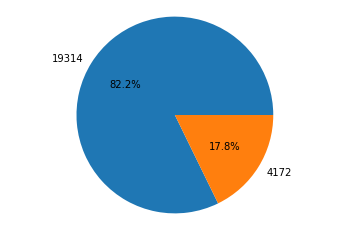

1    19314
0     4172
Name: Recommended IND, dtype: int64

In [0]:
fig1, ax1 = plt.subplots()
a,b=df['Recommended IND'].value_counts()
sizes=[a,b]
labels=[a,b]
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
df['Recommended IND'].value_counts()

In target('Recommended IND') 0 means product is not recommended by the customer where as 1 means product is recommended.

As we can see the target is highly biased with only 17.8% of targets as not recommended.

Building a model on such a biased dataset may lead to learning wrong relationships and predicting wrong as model will be biased towards reccommened class.

Hence we will take same number of instances randomly from both the classes in order to make an unbiased datset.

**Filtering out Rows with column 'Recommended Id' as 1**

In [0]:
# data with target as 1
df1=df.loc[df['Recommended IND'] == 1]

This dataframe has only those rows with Recommended IND = 1

In [0]:
df1

,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,review_len,word_count,Good/bad
0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,53,8,1
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,303,62,1
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,124,22,1
4,847,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,192,36,1
6,858,39,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,496,101,1
...,...,...,...,...,...,...,...,...,...,...,...,...
23480,862,35,NaN,5,1,0,General Petite,Tops,Knits,3,1,1
23481,1104,34,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,131,28,1
23482,862,48,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,223,38,1
23484,1084,28,I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,427,86,1


There are 4172 instances of class not recoomemded(i.e. 0) hence we will take 4172 instances of class recommended(i.e. 1) in order to make datset unbiased.

Instances can be selected randomly as well by
 dataframe.sample(), this function selects rows randomly.
 random_state is seed to the df.sample(), so that it takes same random rows everytime during execution.
 n is the number of rows required here it is 4172
 
 df1new=df1.sample(n = 4172,random_state=1)

Here Im taking first 4172 instances for simplicty.

In [0]:
# 4172 rows with target as 1
df1new=df1[:4172]
#rest of the data which can be used later on after training
df1test=df1[4172:]

print(len(df1new),",",len(df1test))

4172 , 15142


there are total of 4172 rows with 1 as target.

**All the rows with Recommended IND = 0**

In [0]:
# data with target as 0
df0=df.loc[df['Recommended IND'] == 0]
df0

,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,review_len,word_count,Good/bad
2,1077,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,500,98,1
5,1080,49,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,488,98,0
10,1077,53,Dress runs small esp where the zipper area run...,3,0,14,General,Dresses,Dresses,336,66,1
22,1077,31,"First of all, this is not pullover styling. th...",2,0,7,General,Dresses,Dresses,437,85,0
25,697,31,"Loved the material, but i didnt really look at...",3,0,0,Initmates,Intimate,Lounge,340,69,1
...,...,...,...,...,...,...,...,...,...,...,...,...
23449,262,39,I tried these on because the color is really p...,3,0,7,General Petite,Intimate,Lounge,349,65,1
23450,964,40,I wanted to love this jacket. so soft and grea...,3,0,4,General,Jackets,Jackets,318,60,1
23460,1078,34,I purchased this for a very good price and i t...,3,0,0,General,Dresses,Dresses,500,95,1
23478,1104,32,I was surprised at the positive reviews for th...,1,0,0,General Petite,Dresses,Dresses,229,44,0


Both dataframes are concated to form a single final dataframe.

In [0]:
final_df=pd.concat([df0,df1new])
final_df.head()

,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,review_len,word_count,Good/bad
2,1077,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,500,98,1
5,1080,49,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,488,98,0
10,1077,53,Dress runs small esp where the zipper area run...,3,0,14,General,Dresses,Dresses,336,66,1
22,1077,31,"First of all, this is not pullover styling. th...",2,0,7,General,Dresses,Dresses,437,85,0
25,697,31,"Loved the material, but i didnt really look at...",3,0,0,Initmates,Intimate,Lounge,340,69,1


But there are null values in some columns for some rows.

hence removing all NaN values.

In [0]:
final_df['Review Text'].isna().sum()

231

there are in total 238 Nan values

**Dropping rows with Nan values.**

In [0]:
final_df=final_df.dropna()

This is the final Dataframe that will be working on.

In [0]:
final_df.head()

,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,review_len,word_count,Good/bad
2,1077,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,500,98,1
5,1080,49,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,488,98,0
10,1077,53,Dress runs small esp where the zipper area run...,3,0,14,General,Dresses,Dresses,336,66,1
22,1077,31,"First of all, this is not pullover styling. th...",2,0,7,General,Dresses,Dresses,437,85,0
25,697,31,"Loved the material, but i didnt really look at...",3,0,0,Initmates,Intimate,Lounge,340,69,1


**After removing Nan values is the dataset unbiased ?**

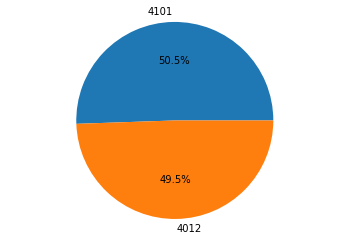

0    4101
1    4012
Name: Recommended IND, dtype: int64

In [0]:
fig1, ax1 = plt.subplots()
a,b=final_df['Recommended IND'].value_counts()
sizes=[a,b]
labels=[a,b]
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
final_df['Recommended IND'].value_counts()

yes the dataset remains unbiased with a small variation.

In [0]:
final_df.head()

,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,review_len,word_count,Good/bad
2,1077,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,500,98,1
5,1080,49,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,488,98,0
10,1077,53,Dress runs small esp where the zipper area run...,3,0,14,General,Dresses,Dresses,336,66,1
22,1077,31,"First of all, this is not pullover styling. th...",2,0,7,General,Dresses,Dresses,437,85,0
25,697,31,"Loved the material, but i didnt really look at...",3,0,0,Initmates,Intimate,Lounge,340,69,1


# Visualising data for better understanding

**Class name**: *it is type of product*

Understanding Class Name with a count plot, which will tell us what product is womens favourite..

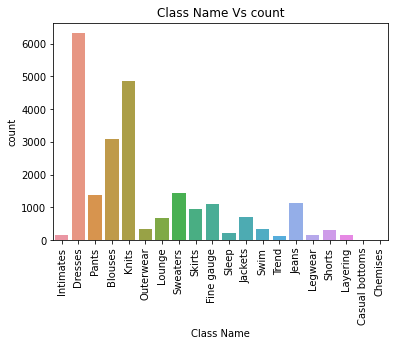

In [0]:
ax = sns.countplot(x="Class Name", data=df)
ax=ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Class Name Vs count')
plt.show()

Hmm.. so dresses are ladies favourite with a count of 6000+

**Age**: *its the age of the reviewer*

Understanding Age group which will tell us what age group shops the msot.

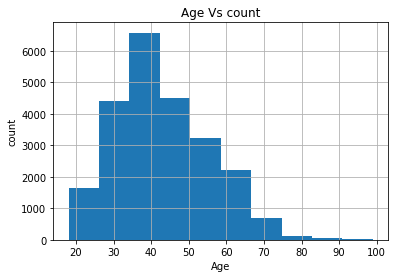

In [0]:
df['Age'].hist()
plt.xlabel('Age')
plt.ylabel('count')
plt.title('Age Vs count')
plt.show()

Hmm.. So ladies in the age group of 35-45 are shopaholic 😜

**Rating**: *Its the 5 star rating which is found these days in every other E-Commerce sites.* 

Understanding Rating using count plot, so that we can see which rating is most common among the 

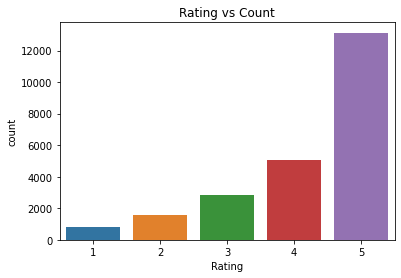

In [0]:
ax1 = sns.countplot(x="Rating", data=df)
plt.title('Rating vs Count')
plt.show()

there are more 5 rated items in the dataset(around 50% ratings are 5)

**positive feedbacks count**: *its the number of +ve feedback counts recieved by a particular product.*

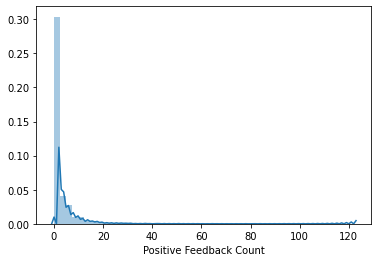

In [0]:
sns.distplot(df['Positive Feedback Count'])
plt.show()

**How positive feedback and classname are related ?**

In [0]:
l=df['Class Name'].unique().tolist()
d={}
for i in l:
  a=df.loc[df['Class Name'] == i ,'Positive Feedback Count'].sum()
  d[i]=a

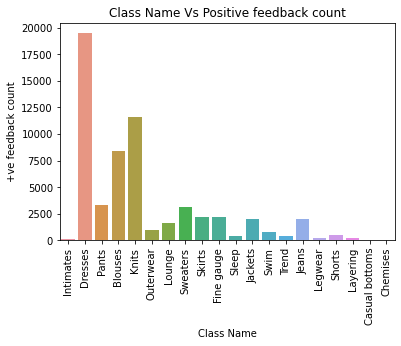

In [0]:
keys = list(d.keys())
values = list(d.values())
sns.barplot(keys,values)
plt.xticks(rotation=90)
plt.ylabel('+ve feedback count')
plt.xlabel('Class Name')
plt.title('Class Name Vs Positive feedback count')
plt.show()

So Dresses have the most positive feedbacks

**Higher Rating ---> Higher reccomendation ???**

Lets find out...

In [0]:
li=df['Rating'].unique().tolist()
di={}
for i in li:
  a=df.loc[df['Rating'] == i ,'Recommended IND'].sum()
  di[i]=a
di

{1: 16, 2: 94, 3: 1189, 4: 4909, 5: 13106}

Here I have created a dictionary with Recommendation count for each star rating. 

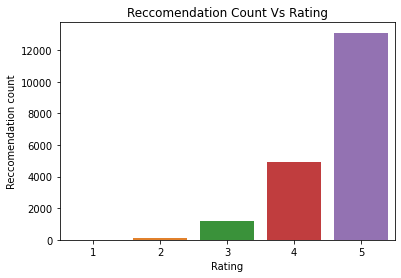

In [0]:
keys = list(di.keys())
values = list(di.values())
sns.barplot(keys,values)
plt.ylabel('Reccomendation count')
plt.xlabel('Rating')
plt.title('Reccomendation Count Vs Rating')
plt.show()

Yes that turns out true !! higher rating turns out to have higher reccomendation.

**Does high rating means more +ve Feedbacks ???**

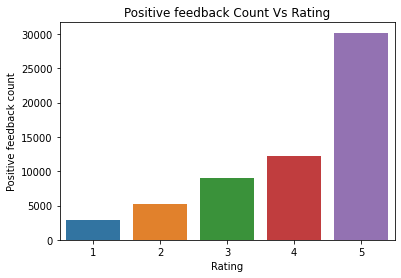

In [0]:
li=df['Rating'].unique().tolist()
di={}
for i in li:
  a=df.loc[df['Rating'] == i ,'Positive Feedback Count'].sum()
  di[i]=a
keys = list(di.keys())
values = list(di.values())
sns.barplot(keys,values)
plt.ylabel('Positive feedback count')
plt.xlabel('Rating')
plt.title('Positive feedback Count Vs Rating')
plt.show()

As expected 5 stars have more +ve feedbacks.

**What is the count of ratings recieved by each class ??**

For example how many 5 star ratings for class 'Dresses' ?

In [0]:
li=df['Class Name'].unique().tolist()
di={}
dict1={}
dict2={}
c1=c2=c3=c4=c5=0
for i in li:
  a=df.loc[df['Class Name'] == i ,'Rating']
  d[i]=a
for i in li:
  for t in list(d[i]):
    c=t
    if c==1:
      c1+=1
      b=c1
    elif c==2:
      c2+=1
      b=c2
    elif c==3:
      c3+=1
      b=c3
    elif c==4:
      c4+=1
      b=c4
    else:
      c5+=1
      b=c5
    dict1={c:b}
    dict2.update(dict1)
    di[i]=dict2
  dict2={}
  c1=c2=c3=c4=c5=0
di

{'Blouses': {1: 119, 2: 229, 3: 394, 4: 669, 5: 1686},
 'Casual bottoms': {4: 1, 5: 1},
 'Chemises': {4: 1},
 'Dresses': {1: 228, 2: 461, 3: 838, 4: 1395, 5: 3397},
 'Fine gauge': {1: 30, 2: 75, 3: 119, 4: 230, 5: 646},
 'Intimates': {1: 7, 2: 8, 3: 16, 4: 27, 5: 96},
 'Jackets': {1: 35, 2: 38, 3: 62, 4: 118, 5: 451},
 'Jeans': {1: 30, 2: 55, 3: 115, 4: 218, 5: 729},
 'Knits': {1: 178, 2: 328, 3: 616, 4: 1132, 5: 2589},
 'Layering': {1: 3, 2: 8, 3: 9, 4: 37, 5: 89},
 'Legwear': {1: 10, 2: 6, 3: 16, 4: 29, 5: 104},
 'Lounge': {1: 23, 2: 25, 3: 78, 4: 160, 5: 405},
 'Outerwear': {1: 14, 2: 22, 3: 29, 4: 83, 5: 180},
 'Pants': {1: 42, 2: 82, 3: 157, 4: 291, 5: 816},
 'Shorts': {1: 9, 2: 17, 3: 41, 4: 67, 5: 183},
 'Skirts': {1: 34, 2: 51, 3: 108, 4: 208, 5: 544},
 'Sleep': {1: 10, 2: 15, 3: 17, 4: 44, 5: 142},
 'Sweaters': {1: 49, 2: 106, 3: 195, 4: 268, 5: 810},
 'Swim': {1: 10, 2: 28, 3: 42, 4: 73, 5: 197},
 'Trend': {1: 11, 2: 11, 3: 19, 4: 26, 5: 52}}

here i have created a 2 dimensional dictionary which contains the count of star ratings for each class.

For example: 

'Fine gauge': {1: 30, 2: 75, 3: 119, 4: 230, 5: 646}

'Fine guage' has 30 '1' star rating 75 '2' star etc.

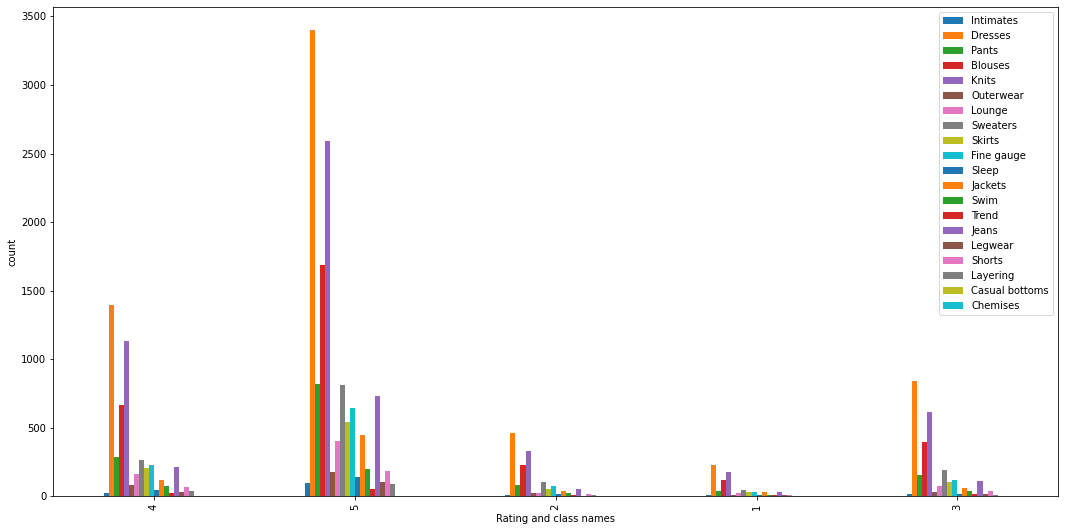

In [0]:
pd.DataFrame(di).plot(kind='bar',figsize=(18,9))
plt.xlabel('Rating and class names')
plt.ylabel('count')
plt.show()

This graph shows the count of rating for each class Name.
In each rating count of all the class names are plotted.

Here we can see that in all the ratings class 'Dresses' is dominating as it is bought more. The count is more in 5 star rating and count gradually decreases in lower rating which is good.

**Distribution of word count**

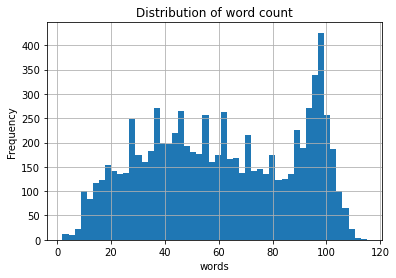

In [0]:
final_df['word_count'].plot(kind='hist',grid=True,bins=50)
plt.title('Distribution of word count')
plt.xlabel('words')
plt.show()

There are quite a number of people with long reviews.

**Distribution of Review length**

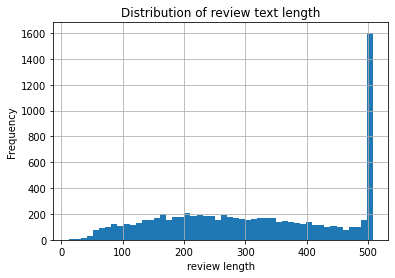

In [0]:
final_df['review_len'].plot(kind='hist',grid=True,bins=50)
plt.title('Distribution of review text length')
plt.xlabel('review length')
plt.show()

There were almost 1600 people with 500 characters long reviews where as all other reviews are below 200 characters.

We can see that word-count and review-length are very differently distributed.

 **Does word count have any relation with Recommended IND ?**

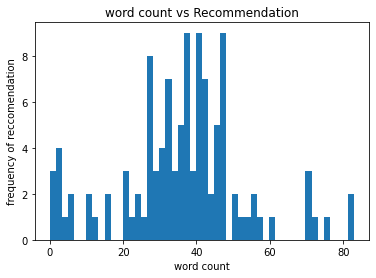

In [0]:
# final_df.groupby('word_count').count()['Recommended IND'].plot(kind='hist',grid=True)
# plt.xlabel('Word count')
# plt.ylabel('Recommended count') 
di={}
li=[]
li=final_df['word_count'].unique().tolist()
for i in li:
  a=final_df.loc[final_df['word_count'] == i ,'Recommended IND'].sum()
  di[i]=a
values=list(di.values())
plt.hist(values,bins=50)
plt.xlabel('word count')
plt.ylabel('frequency of reccomendation')
plt.title('word count vs Recommendation')
plt.show()

We can see that reviews with word-count near 40 have highehst recommendarion count. So reviews with word-count near to 40 are are most likely to be recommended.

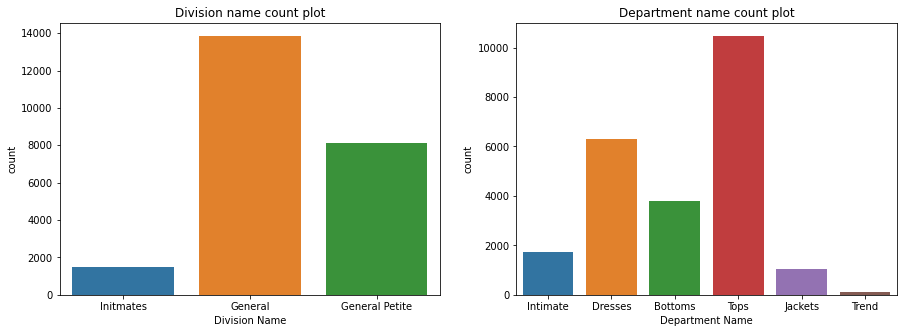

In [0]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(df['Division Name'])
plt.title("Division name count plot")
plt.subplot(1,2,2)
sns.countplot(df['Department Name'])
plt.title("Department name count plot")
plt.show()

**Interpreting count plot of Divsion name** 
>categories: General, Petite, and Intimates. This offers some insight into the clothing sizes of the customers leaving reviews.

**Interpreting count plot of Department name**
>Tops and dresses are the most reviewed products

**How many products are good or bad ??**

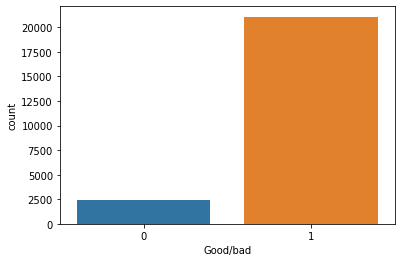

1-> Good
0-> Bad


In [0]:
sns.countplot(df['Good/bad'])
plt.show()
print("1-> Good\n0-> Bad")

Rating above 3 is termed as good product otherwise bad product.

We can see majority of the products are termed as good.

**All the good products are recommended ??**

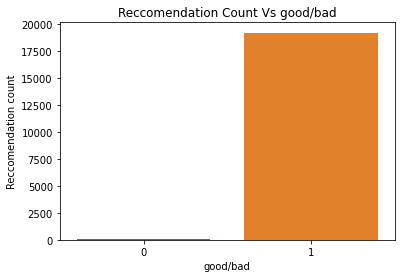

{0: 110, 1: 19204}

In [0]:
li=[0,1]
di={}
for i in li:
  a=df.loc[df['Good/bad'] == i ,'Recommended IND'].sum()
  di[i]=a
keys = list(di.keys())
values = list(di.values())
sns.barplot(keys,values)
plt.ylabel('Reccomendation count')
plt.xlabel('good/bad')
plt.title('Reccomendation Count Vs good/bad')
plt.show()
di

We can say that products which are good are recommended.

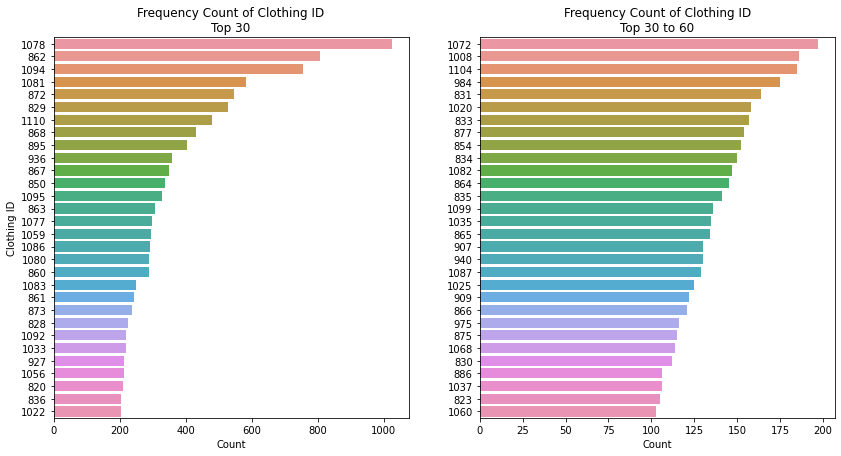

In [0]:
f, axes = plt.subplots(1,2, figsize=[14,7])
num = 30
sns.countplot(y="Clothing ID", data = df[df["Clothing ID"].isin(df["Clothing ID"].value_counts()[:num].index)],
              order= df["Clothing ID"].value_counts()[:num].index, ax=axes[0])
axes[0].set_title("Frequency Count of Clothing ID\nTop 30")
axes[0].set_xlabel("Count")

sns.countplot(y="Clothing ID", data = df[df["Clothing ID"].isin(df["Clothing ID"].value_counts()[num:60].index)],
              order= df["Clothing ID"].value_counts()[num:60].index, ax=axes[1])
axes[1].set_title("Frequency Count of Clothing ID\nTop 30 to 60")
axes[1].set_ylabel("")
axes[1].set_xlabel("Count")
plt.show()

clothing Id 1078 is very popular among the customers

# Cleaning text & making a vocabulary

**Cleaning text review**

> clean_word() takes words and removes any special character(,/.*\%$#@-!_) so that cleaned words can be retreived for training the model.

In [0]:
#Function to clean token vector of symbols

def clean_word(word_list):
  new = []
  for i, word in enumerate(word_list):
    word = word.replace('.', '')
    word = word.replace('-', '')
    word = word.replace(',', '')
    word = word.replace(';', '')
    word=word.replace('!','')
    word=word.replace('@','')
    word=word.replace('$','')
    word=word.replace('_','')
    word=word.replace('%','')
    word=word.replace('*','')
    word=word.replace('?','')
    word=word.replace('#','')
    word=word.replace('\r','')
    word=word.replace('\n','')
    word=word.replace('\t','')
    word=word.replace('/','')

    # all the words are made to lower case as letters can be capital at the start of a sentence,
    # thus both the words would be considered different. To avoid this, converting all the words to lower case.
    word = word.lower()
    if word.isalpha() or word.isdigit():
      new.append(word)
    
  return new

Tokenize each sentence , all the words are appended in a list of list.

**Tokenize** :*break (text) into individual linguistic units.*

In [0]:
text = final_df['Review Text'].values
text_arr = [row.split(' ') for row in text]

**Creating a vocabulary of words**

![alt text](https://learnenglish.britishcouncil.org/sites/podcasts/files/styles/article/public/GettyImages-1166859687%20%281%29.jpg?itok=oOvbNb5j)

Vocabulary contains all the unique words in the dataset.

In [0]:
# clean every token word and create vocabulary out of it.
vocab = []
clean_text_array = []

for row in text_arr:
  clean_row = clean_word(row)
  clean_text_array.append(clean_row)
  vocab.extend(clean_row)

# create a vocabulary - making sure each word appears only once
vocabulary = list(set(clean_word(vocab)))

len(vocabulary)

11233

There are various features which can be taken as target to build our model.
- **Recommended IND** : Predicting whether a product is recommended or not
- **Good/bad** : Predicting whether the product is good or bad.
- **class name** : Predicting the class name of the product from reviews.

Recommended Ind and Good/bad features can lead an E-commerce platform for making profits, they can get an insight from the model what kind of product is popular and bring that more in stock to make huge profits.They can even randomly recommend the popular products to everyone as most of them will end up buying.

Where as predicting class name from reviews is not that useful for an e-commerce website bur from ML perspective quite intresting.

>Here I have divided project into 3 section.
- Firstly we will try predicting class name from reviews
- Second we will classify products into good/bad from reviews
- Third we will predict whether the product will be recommended by the customer or not based upon the review,

# Class Name
## Model 1 Word Embedding using NN words are LabelEncoded

## Target is Class name, targets are also LabelEncoded

This model classifies product into garments based on the review

>Word embeddings are a type of word representation that allows words with similar meaning to have a similar representation.

>In this model words in the vocabulary are encoded using labelEncoder() which encodes each word in the vocabulary with a unique number.

*Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form*.

>Call the fit() function in order to learn a vocabulary from one or more documents. Call the transform() function on one or more documents as needed to encode each as a vector

In [0]:
vectorizer = LabelEncoder()
vectorizer.fit(vocabulary)

# Create token vector using Label Encoder fit on entire vocabulary
token_vector = []

# declare max_words to keep count of the longest sentence vectorized
# we need this to pad every other vector to same length as longest vector
max_words = 0 
for row in clean_text_array:
  encoded = vectorizer.transform(row).tolist()
  size = len(encoded)
  if size>max_words: max_words=size
  token_vector.append(encoded)

# looking at one of the lalbel_encoded words
vectorizer.classes_[1000]

'bellowy'

After encoding words are encoded with unique number as we can see here 'bellowy' is encoded as 1000

Max words is the maximum number of words in a sentence.

In [0]:
max_words

111

Sentences with words less than max_words are padded with 0s at the end to have same length vectors to work with.

In [0]:
# Pad every vector in token vector corpus to be as long as longest vector
padded = []
for row in token_vector:
  r = np.pad(row, (0, max_words-len(row)), 'constant')
  padded.append(r)

In [0]:
# Convert it into numpy array, we'll call this the examples vector
# as it contains all the example to be trained on
ex_vector = np.array(padded)
ex_vector.shape

(8113, 111)

These are the various classes in feature Class Name.

In [0]:
print(final_df['Class Name'].unique())

['Dresses' 'Lounge' 'Sweaters' 'Intimates' 'Knits' 'Blouses' 'Swim'
 'Fine gauge' 'Skirts' 'Pants' 'Jeans' 'Jackets' 'Sleep' 'Trend' 'Legwear'
 'Outerwear' 'Shorts' 'Layering']


For this model target is class Name which is catgorical.

In [0]:
target=final_df['Class Name'].values

As the target is categorical it must be converted into integers to fed into the model, therefore labelencoding target

In [0]:
le = LabelEncoder()
target = le.fit_transform(final_df['Class Name'])
target

array([1, 1, 1, ..., 1, 6, 1])

> split training data and target into test and train sets using train_test_split() from sklearn. This function takes 3 arguments training data, target and size. here size is 0.2 hence data will be splitted 80% for training and 20% for test.

In [0]:
# Split the data into test & train dataset
xtrain, xtest, ytrain, ytest = train_test_split(ex_vector,target, test_size=0.2)

>Create tensors out of numpy arrays xtrain,ytrain and xtest,ytest. 

**Tensors** are mathematical objects that generalize scalars, vectors and matrices to higher dimensions.

Tensors must be created as word embedding layer in keras take tensors as input.

In [0]:
# Create a tensor out of numpy arrays
train_dataset = tf.data.Dataset.from_tensor_slices((xtrain, ytrain))
test_dataset = tf.data.Dataset.from_tensor_slices((xtest, ytest))

Batch size is a term used in machine learning and refers to the number of training examples utilized in one iteration. Model trains data in batches.Usually batch size is taken as 32,64,128...

Batch shuffle size is size in which data is shuffled.It is used for shuffling of data which is alread done during train test split also.

In [0]:
# shuffle the data and create batches out of it
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

**Model**
>The focus of the Keras library is a model.The simplest model is defined in the Sequential class which is a linear stack of Layers.

>Keras offers an Embedding layer that can be used for neural networks on text data. It requires that the input data be integer encoded, so that each word is represented by a unique integer.
- input_dim: This is the size of the vocabulary in the text data
- embedding_dim : features around which the model will learn correlatin based on.


>There are a large number of core Layer types for standard neural networks.
Some common and useful layer types are:
- Dense: Fully connected layer and the most common type of layer used on multi-layer perceptron models.
- Dropout: Apply dropout to the model, setting a fraction of inputs to zero in an effort to reduce over fitting.
- Merge: Combine the inputs from multiple models into a single model.


>Keras supports a range of standard neuron activation function, such as: softmax, rectifier, tanh and sigmoid.

>Input layer takes length of vocaulary.There is only 1 hidden layer.
As there are 18 classes in target output layer hass 18 nodes.

In [0]:
# Define the embedding dimensions
embedding_dim=10

# defining the sequential model with an Embedding layer
# Add a Global Average Pooling 1D layer to flattent the matrix into vector
model = keras.models.Sequential([
  keras.layers.Embedding(11233, embedding_dim),
  keras.layers.GlobalAveragePooling1D(),
  keras.layers.Dense(36, activation='relu'),
  keras.layers.Dense(18, activation='softmax')
])

**Compiling Model**
>Here we need to specify optimizer.

Optimizers are algorithms or methods used to change the attributes of your neural network such as weights and learning rate in order to reduce the losses

> Here we deifne the learning rate as well. here it is 0.001.

>Loss: A scalar value that we attempt to minimize during our training of the model. The lower the loss, the closer our predictions are to the true labels. There are various ways for calculating losses. 

In [0]:
model.compile(optimizer=keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

**Training our Model**

>An **epoch** is a measure of the number of times all of the training vectors are used once to update the weights. For batch training all of the training samples pass through the learning algorithm simultaneously in one epoch before weights are updated.

Epochs cannot be less as then model would be undertrained whereas epochs should not be moe also then model will be overtrained.

model.fit() trains the predefined model.

In [0]:
# Train the model and benchmark against Test Data as it's validation data
epochs=20
history = model.fit(train_dataset, epochs=epochs, validation_data=test_dataset, verbose=2)

Epoch 1/20
115/115 - 1s - loss: 2.6745 - accuracy: 0.2694 - val_loss: 2.2660 - val_accuracy: 0.2771
Epoch 2/20
115/115 - 0s - loss: 2.2327 - accuracy: 0.2806 - val_loss: 2.1813 - val_accuracy: 0.2771
Epoch 3/20
115/115 - 0s - loss: 2.2037 - accuracy: 0.2806 - val_loss: 2.1623 - val_accuracy: 0.2771
Epoch 4/20
115/115 - 0s - loss: 2.1836 - accuracy: 0.2806 - val_loss: 2.1414 - val_accuracy: 0.2771
Epoch 5/20
115/115 - 0s - loss: 2.1574 - accuracy: 0.2808 - val_loss: 2.1121 - val_accuracy: 0.2771
Epoch 6/20
115/115 - 0s - loss: 2.1139 - accuracy: 0.2905 - val_loss: 2.0550 - val_accuracy: 0.2993
Epoch 7/20
115/115 - 0s - loss: 2.0369 - accuracy: 0.3280 - val_loss: 1.9712 - val_accuracy: 0.3448
Epoch 8/20
115/115 - 0s - loss: 1.9362 - accuracy: 0.3721 - val_loss: 1.8823 - val_accuracy: 0.3879
Epoch 9/20
115/115 - 0s - loss: 1.8396 - accuracy: 0.4124 - val_loss: 1.8059 - val_accuracy: 0.4273
Epoch 10/20
115/115 - 0s - loss: 1.7543 - accuracy: 0.4423 - val_loss: 1.7394 - val_accuracy: 0.4433

Accuracy : 56%
validation accuracy: 51%

As we can see the model could not predict classes well because reviews have very less referrence to class name. This is because Class Name feature is largely biased towards some classes due to which model would be baised towards them.

**Accuracy Curve**
>This graph shows how accuracy changed during the training period. We can say that training was pretty good as both accuracy and validation accuracy curves are close by all the time but accuracy could not reach higher values.
Training more would over train the model as at the end both the curves are starting to diverge.

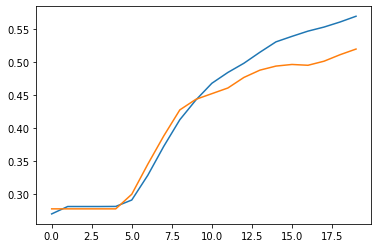

In [0]:
# Plot Accuracy
plt.plot(range(epochs), history.history['accuracy'])
plt.plot(range(epochs), history.history['val_accuracy'])

**Loss Curve**
>Loss curves tells us that how losses reduce during the training period. As both the loss curves are nearby we could say the trianing went well but losses could not reduce further. Lesser the losses better is the accuracy.

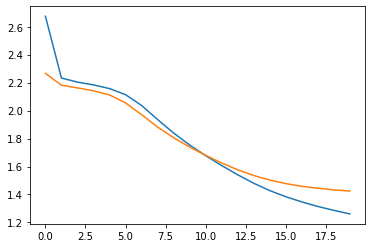

In [0]:
# Plot Loss
plt.plot(range(epochs), history.history['loss'])
plt.plot(range(epochs), history.history['val_loss'])

# Good / bad
## Model 2 : Word Embedding using NN, words are LabelEncoded

## Target is Good/bad

As we have done label encoding on the vocabulary once, we will use example

In [0]:
target=final_df['Good/bad'].values

> Splitting into test and train sets

In [0]:
xtrain, xtest, ytrain, ytest = train_test_split(ex_vector,target, test_size=0.1)

> Creating tensors out of train and test arrays




In [0]:
# Create a tensor out of numpy arrays
train_dataset = tf.data.Dataset.from_tensor_slices((xtrain, ytrain))
test_dataset = tf.data.Dataset.from_tensor_slices((xtest, ytest))

> Making batches to train model

In [0]:
# shuffle the data and create batches out of it
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

> Model

In [0]:
# Define the embedding dimensions // features around which the model will learn
# correlatin based on.
embedding_dim=5

# defining the sequential model with an Embedding layer
# Add a Global Average Pooling 1D layer to flattent the matrix into vector
model = keras.models.Sequential([
  keras.layers.Embedding(11233, embedding_dim),
  keras.layers.GlobalAveragePooling1D(),
  keras.layers.Dense(20, activation='relu'),
  keras.layers.Dense(1, activation='sigmoid')
])

> Compiling Model

In [0]:
model.compile(optimizer=keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

> Training 

In [0]:
# Train the model and benchmark against Test Data as it's validation data
epochs=10
history = model.fit(train_dataset, epochs=epochs, validation_data=test_dataset, verbose=2)

Epoch 1/10
115/115 - 0s - loss: 0.6328 - accuracy: 0.7178 - val_loss: 0.5826 - val_accuracy: 0.7303
Epoch 2/10
115/115 - 0s - loss: 0.5884 - accuracy: 0.7178 - val_loss: 0.5737 - val_accuracy: 0.7303
Epoch 3/10
115/115 - 0s - loss: 0.5791 - accuracy: 0.7178 - val_loss: 0.5633 - val_accuracy: 0.7303
Epoch 4/10
115/115 - 0s - loss: 0.5624 - accuracy: 0.7178 - val_loss: 0.5437 - val_accuracy: 0.7303
Epoch 5/10
115/115 - 0s - loss: 0.5286 - accuracy: 0.7192 - val_loss: 0.5025 - val_accuracy: 0.7340
Epoch 6/10
115/115 - 0s - loss: 0.4671 - accuracy: 0.7509 - val_loss: 0.4543 - val_accuracy: 0.7722
Epoch 7/10
115/115 - 0s - loss: 0.4139 - accuracy: 0.7936 - val_loss: 0.4279 - val_accuracy: 0.7796
Epoch 8/10
115/115 - 0s - loss: 0.3789 - accuracy: 0.8188 - val_loss: 0.4166 - val_accuracy: 0.7943
Epoch 9/10
115/115 - 0s - loss: 0.3542 - accuracy: 0.8341 - val_loss: 0.4122 - val_accuracy: 0.7931
Epoch 10/10
115/115 - 0s - loss: 0.3344 - accuracy: 0.8488 - val_loss: 0.4116 - val_accuracy: 0.7906

Accuracy  : 84%
validation Accuracy : 79%

Here we can see that we get a better acuuracy compared to the Class name model.
Even though the good/bad feature was baised as we saw in visualisation we get better accuracy because words used in reviews correspond to good / bad product very well.

> Plotting Accuracy curve



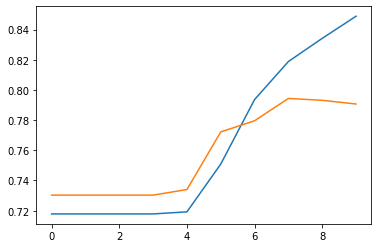

In [0]:
plt.plot(range(epochs), history.history['accuracy'])
plt.plot(range(epochs), history.history['val_accuracy'])

> Plotting Loss curve

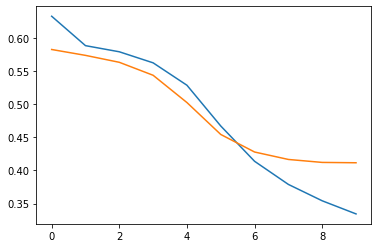

In [0]:
# Plot Loss
plt.plot(range(epochs), history.history['loss'])
plt.plot(range(epochs), history.history['val_loss'])

# Recommended IND

>In this section we will be building models that predict whether a product will be recommended by the customer or not based upon the review given by the customer.

## Model 3: NN with TFIDF vectorizer


>  TFIDF, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.



In [184]:
vectoriz = TfidfVectorizer()
tfidf_vec = vectoriz.fit_transform(final_df['Review Text'].values)
print(tfidf_vec.toarray()[0])

[0. 0. 0. ... 0. 0. 0.]


> Singular value decomposition (SVD) provides another way to factorize a matrix, into singular vectors and singular values

>Truncated Singular Value Decomposition (SVD) is a matrix factorization technique that factors a matrix M into the three matrices U, Σ, and V. This is very similar to PCA, excepting that the factorization for SVD is done on the data matrix, whereas for PCA, the factorization is done on the covariance matrix.

In [185]:
tsvd = TruncatedSVD(n_components=100)
tsvd.fit(tfidf_vec)
scaled = tsvd.transform(tfidf_vec)
print(scaled)

[[ 3.22136194e-01 -4.41275749e-02 -6.19215238e-02 ... -3.00859906e-03
  -5.76543285e-03 -3.89816790e-02]
 [ 4.26110973e-01 -4.17914276e-02 -4.08250825e-02 ... -4.26526809e-02
   5.75513314e-03  4.07022984e-03]
 [ 3.89274455e-01 -1.23650608e-01 -2.87770720e-02 ...  1.85202517e-02
   3.64450398e-02 -1.66626538e-02]
 ...
 [ 3.08248944e-01  8.70406571e-04 -3.94909747e-02 ... -6.20104577e-03
   1.77114396e-02  1.59560346e-02]
 [ 1.58785469e-01  7.15607990e-02  1.28226394e-01 ... -2.26611743e-02
   3.15472683e-04  4.35531155e-03]
 [ 2.94616574e-01  3.50954317e-02 -7.99175209e-02 ...  6.00733019e-03
  -3.05665371e-02  6.28611270e-02]]


> Target is Recommended Ind

In [0]:
target=final_df['Recommended IND'].values

> Model

In [0]:
model = keras.models.Sequential([
        keras.layers.Dense(60, input_shape=[100,], activation='relu'),
        keras.layers.Dense(20, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
]) 

Compiling Model

> here loss function is Binay cross Entropy as target is binary i.e(0 or 1)

In [0]:
model.compile(optimizer=keras.optimizers.Adam(0.001),
              loss=keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

> Training

In [194]:
history= model.fit(scaled, target, epochs=10, verbose=1, validation_split=0.3)

Epoch 1/10
178/178 [==============================] - 0s 2ms/step - loss: 0.5771 - accuracy: 0.7202 - val_loss: 1.0678 - val_accuracy: 0.0904
Epoch 2/10
178/178 [==============================] - 0s 2ms/step - loss: 0.3592 - accuracy: 0.8554 - val_loss: 0.6929 - val_accuracy: 0.6750
Epoch 3/10
178/178 [==============================] - 0s 2ms/step - loss: 0.3073 - accuracy: 0.8783 - val_loss: 0.6845 - val_accuracy: 0.6861
Epoch 4/10
178/178 [==============================] - 0s 2ms/step - loss: 0.2987 - accuracy: 0.8820 - val_loss: 0.6563 - val_accuracy: 0.7038
Epoch 5/10
178/178 [==============================] - 0s 2ms/step - loss: 0.2948 - accuracy: 0.8854 - val_loss: 0.7764 - val_accuracy: 0.6561
Epoch 6/10
178/178 [==============================] - 0s 2ms/step - loss: 0.2924 - accuracy: 0.8866 - val_loss: 0.6170 - val_accuracy: 0.7260
Epoch 7/10
178/178 [==============================] - 0s 2ms/step - loss: 0.2899 - accuracy: 0.8862 - val_loss: 0.7555 - val_accuracy: 0.6602
Epoch 

Accuracy : 89%
validation Accuracy : 75%



> Accuracy Plot

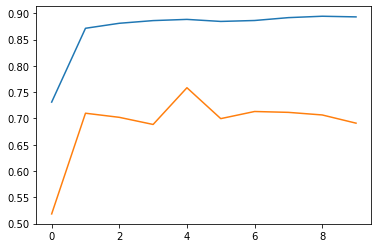

In [190]:
plt.plot(range(epochs), history.history['accuracy'])
plt.plot(range(epochs), history.history['val_accuracy'])

> loss plot

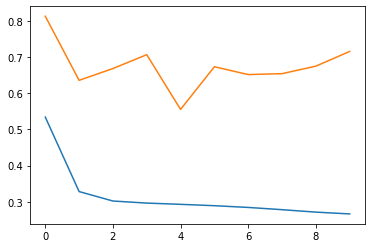

In [191]:
# Plot Loss
plt.plot(range(epochs), history.history['loss'])
plt.plot(range(epochs), history.history['val_loss'])

## Model 4: NN using Count Vectorizer 

The CountVectorizer provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words, but also to encode new documents using that vocabulary

In [0]:
vec=CountVectorizer()

Fit and transform vocabulary 

In [0]:
vec.fit(final_df["Review Text"].values)
count_vect=vec.transform(final_df["Review Text"].values)

In [0]:
voca=vec.vocabulary_

In [220]:
len(voca)

9269

In [221]:
count_vect.shape

(8113, 9269)

In [0]:
count_arr=count_vect.toarray()

In [0]:
tsvd = TruncatedSVD(n_components=50)
tsvd.fit(count_arr)
scaled = tsvd.transform(count_arr)

In [224]:
scaled.shape

(8113, 50)

In [225]:
target=final_df['Recommended IND'].values
target.shape

(8113,)

In [0]:
model = keras.models.Sequential([
        keras.layers.Dense(15, input_shape=[50,], activation='relu'),
        keras.layers.Dense(10, activation='relu'),
        keras.layers.Dense(2, activation='softmax')
]) 

In [0]:
model.compile(optimizer=keras.optimizers.Adam(0.001),
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [228]:
model.fit(scaled, target, epochs=10, verbose=1, validation_split=0.4)

Epoch 1/10
153/153 [==============================] - 0s 3ms/step - loss: 0.4721 - accuracy: 0.8206 - val_loss: 1.4136 - val_accuracy: 0.1473
Epoch 2/10
153/153 [==============================] - 0s 2ms/step - loss: 0.3633 - accuracy: 0.8667 - val_loss: 1.4894 - val_accuracy: 0.2388
Epoch 3/10
153/153 [==============================] - 0s 2ms/step - loss: 0.3261 - accuracy: 0.8800 - val_loss: 1.3022 - val_accuracy: 0.3417
Epoch 4/10
153/153 [==============================] - 0s 2ms/step - loss: 0.3110 - accuracy: 0.8864 - val_loss: 1.3104 - val_accuracy: 0.3654
Epoch 5/10
153/153 [==============================] - 0s 2ms/step - loss: 0.3010 - accuracy: 0.8888 - val_loss: 1.2471 - val_accuracy: 0.4251
Epoch 6/10
153/153 [==============================] - 0s 2ms/step - loss: 0.2964 - accuracy: 0.8925 - val_loss: 1.2487 - val_accuracy: 0.4177
Epoch 7/10
153/153 [==============================] - 0s 2ms/step - loss: 0.2912 - accuracy: 0.8934 - val_loss: 1.3988 - val_accuracy: 0.3635
Epoch 

## Model 5 : Word embedding using Nueral Networks words are LabelEncoded



> target is taken as 'Recommended Ind'

In [0]:
target=final_df['Recommended IND'].values
target.shape

(8113,)

> Split the data into test & train dataset
using train_test_split from sklearn

In [0]:
xtrain, xtest, ytrain, ytest = train_test_split(ex_vector,target, test_size=0.1)

> Create tensors out of numpy arrays xtrain,ytrain and xtest,ytest 

In [0]:
train_dataset = tf.data.Dataset.from_tensor_slices((xtrain, ytrain))
test_dataset = tf.data.Dataset.from_tensor_slices((xtest, ytest))

> shuffle the data and create batches out of it

In [0]:
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [0]:
# Define the embedding dimensions // features around which the model will learn
# correlatin based on.
embedding_dim=10

# defining the sequential model with an Embedding layer
# Add a Global Average Pooling 1D layer to flattent the matrix into vector
model = keras.models.Sequential([
  keras.layers.Embedding(11305, embedding_dim),
  keras.layers.GlobalAveragePooling1D(),
  keras.layers.Dense(5, activation='relu'),
  keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
model.compile(optimizer=keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [0]:
# Train the model and benchmark against Test Data as it's validation data
epochs=20
history = model.fit(train_dataset, epochs=epochs, validation_data=test_dataset, verbose=2)

Epoch 1/20
115/115 - 0s - loss: 0.6869 - accuracy: 0.6284 - val_loss: 0.6772 - val_accuracy: 0.6835
Epoch 2/20
115/115 - 0s - loss: 0.6547 - accuracy: 0.7558 - val_loss: 0.6307 - val_accuracy: 0.7783
Epoch 3/20
115/115 - 0s - loss: 0.5877 - accuracy: 0.8296 - val_loss: 0.5594 - val_accuracy: 0.8103
Epoch 4/20
115/115 - 0s - loss: 0.5043 - accuracy: 0.8534 - val_loss: 0.4881 - val_accuracy: 0.8337
Epoch 5/20
115/115 - 0s - loss: 0.4313 - accuracy: 0.8686 - val_loss: 0.4365 - val_accuracy: 0.8337
Epoch 6/20
115/115 - 0s - loss: 0.3782 - accuracy: 0.8780 - val_loss: 0.4037 - val_accuracy: 0.8350
Epoch 7/20
115/115 - 0s - loss: 0.3399 - accuracy: 0.8856 - val_loss: 0.3813 - val_accuracy: 0.8362
Epoch 8/20
115/115 - 0s - loss: 0.3123 - accuracy: 0.8947 - val_loss: 0.3693 - val_accuracy: 0.8399
Epoch 9/20
115/115 - 0s - loss: 0.2909 - accuracy: 0.9000 - val_loss: 0.3607 - val_accuracy: 0.8461
Epoch 10/20
115/115 - 0s - loss: 0.2734 - accuracy: 0.9066 - val_loss: 0.3555 - val_accuracy: 0.8473

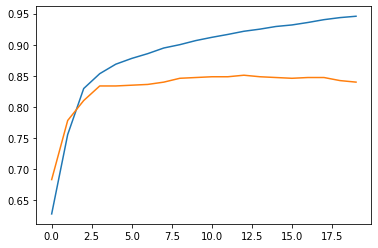

In [0]:
# Plot Accuracy
plt.plot(range(epochs), history.history['accuracy'])
plt.plot(range(epochs), history.history['val_accuracy'])


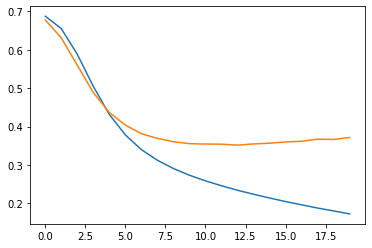

In [0]:
# Plot Loss
plt.plot(range(epochs), history.history['loss'])
plt.plot(range(epochs), history.history['val_loss'])

Validating Model with raw data

In [0]:
data=final_df['Review Text'][:10]

In [0]:
data

2     I had such high hopes for this dress and reall...
5     I love tracy reese dresses, but this one is no...
10    Dress runs small esp where the zipper area run...
22    First of all, this is not pullover styling. th...
25    Loved the material, but i didnt really look at...
26    I have been waiting for this sweater coat to s...
33    I ordered this 3 months ago, and it finally ca...
56    I am pregnant and i thought this would be a gr...
57    This tank fit well and i loved the ruffle in t...
61    3 tags sewn in, 2 small (about 1'' long) and 1...
Name: Review Text, dtype: object

In [0]:
text_arr = [row.split(' ') for row in data]

In [0]:
clean_text=[]

for row in text_arr:
  clean_row=clean_word(row)
  clean_text.append(clean_row)

In [0]:
test_token_vector = []

for row in clean_text:
  encoded = vectorizer.transform(row).tolist()
  test_token_vector.append(encoded)


In [0]:
padded = []
for row in test_token_vector:
  r = np.pad(row, (0, max_words-len(row)), 'constant')
  padded.append(r)

In [0]:
pred=model.predict(np.array(padded))

In [0]:
res=[]
for op in np.round(pred):
  res.append(op)
  print(op)

[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


In [0]:
b=final_df['Recommended IND'][:10].tolist()
b

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [0]:
def accuracy():
  score=0
  for i in range(len(res)):
    if res[i]==b[i]:
      score+=1
  result=(score/len(res))*100
  print(f"accuracy: {result}%")
accuracy()

accuracy: 100.0%


#Conclusion
                                          Target               Accuracy

    Model 1: Word Embedding              Class Name              50%

    Model 2: Word Embedding              Good/bad                84%

    Model 3: NN with TFIDF vectorizer    Recommended IND         89%

    Model 4: NN using Count Vectorizer   Recommended IND         82%

    Model 5 : Word Embedding             Recommended IND         94%

> Best results were achieved using word embedding with target as Recommended IND which tells us that Reviews can be interpreted in a better way to understand what product a customer is likely to recommend this also leads to what the customer wants. Fullfilling these demands would increase the websites revenue shoot like a rocket.

# ThankYou